## Unsupervised Learning in Machine Learning - Clustering

In this notebook you will get familiar with K means clustering algorithm using PyCaret python package with preprocessed "Pima Indians Diabetes Database" dataset.


**Please create a report by addressing the provided questions(Q1-Q6) throughout the notebook.**

## Import libraries

The following code should be adapted if you run this on your laptop. You should already have a conda environment where you have installed pycaret so you can skip the pip install step (comment it out or remove cell). Change also the path (and file name) to load your preprocessed data.

In [2]:
# install pycaret this way if you are running this notebook in google colab environment.
# !pip install joblib==1.3.0
# !pip install pycaret 

In [1]:
from pycaret.clustering import * #importing pycaret clustering module
import plotly.express as px

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load the preprocessed data

url = "https://raw.githubusercontent.com/thilinib/CBM101/main/E_Macine_Learning/data/preprocessed_diabetes.csv"
df = pd.read_csv(url)

In [3]:
# check the shape of the preprocessed data
df.shape

(394, 9)

In [4]:
# check how preprocessed data looks like
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66,23,94,28.1,0.167,21,0
1,0,137.0,40,35,168,43.1,2.288,33,1
2,3,78.0,50,32,88,31.0,0.248,26,1
3,2,197.0,70,45,543,30.5,0.158,53,1
4,1,189.0,60,23,846,30.1,0.398,59,1


As you may remember, you have 8 measurement features and one column specifying the outcome. Let's try to cluster this data considering all measured features.

You have already explored the data by plotting it along axis that show two features, e.g. with the seaborn scatterplot. Below, is an example plot of Insulin vs Glucose.

After we cluster the data, we would like to know whether the clusters are separating in the high-dimensional (in this data 8-dimensional) feature space. For that purpose we will apply dimensionality reduction methods, including PCA, t-SNE and UMAP to visualize clustering results and examine how they relate to the outcome variable.

<Axes: xlabel='Insulin', ylabel='Glucose'>

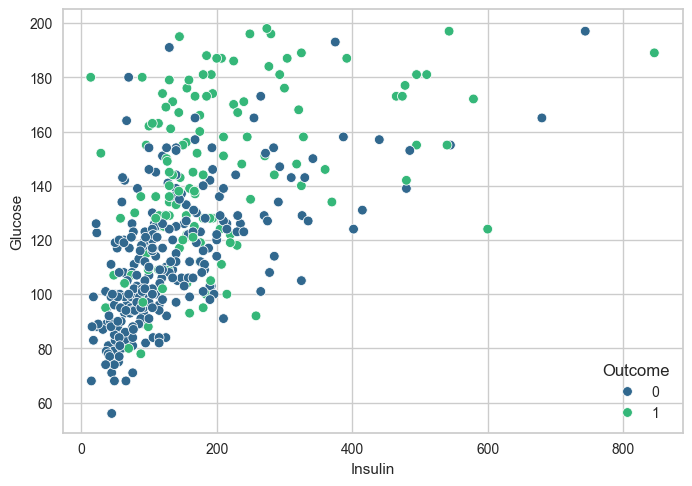

In [5]:
sns.scatterplot(data=df, x=df.Insulin, y=df.Glucose, hue=df.Outcome, palette='viridis')

#1. Setup
Initialize PyCaret's clustering module with the dataset.


Are you wondering what this function will do to your data? You should :-) The pycaret package tries to do clever things with your data. Check carefully the function description for setup and make notes about default settings.

Remember also that your dataset has one column that indicates the outcome. The main goal here is to examine how the other measured features relate to outcome, specifically here we are interested to find out if the diabetic cases separate from non-diabetic using clustering-based methods. You should therefore perform clustering on those features (set parameter ignore accordingly to omit "outcome" feature).

In [6]:
?setup

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    preprocess: bool = True,
    create_date_columns: List[str] = ['day', 'month', 'year'],
    imputation_type: Optional[str] = 'simple',
    numeric_imputation: str = 'mean',
    categorical_imputation: str = 'mode',
    text_features_method: str = 'tf-idf',


In [7]:
s = setup(df, ignore_features=['Outcome'])

,Description,Value
0,Session id,2948
1,Original data shape,"(394, 9)"
2,Transformed data shape,"(394, 8)"
3,Ignore features,1
4,Numeric features,8
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. Following are some important features

**Original Data** : Displays the original shape of
dataset.

**Numeric Features** : The number of features inferred as numeric.

**preprocess**: bool, default = True - When set to False, no transformations are applied except for train_test_split

**imputation_type**: str or None, default = 'simple'.
    The type of imputation to use. It can be either simple or iterative. Unsupervised learning only supports
    'imputation_type=simple'. If None, no imputation of missing values
    is performed.

**numeric_imputation**: str, default = 'mean', there are many methods like mode, median, drop, knn

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. You can check more on preprocessing from [here](https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation#missing-values)


**Q1**

> Why we need to call setup function and what are the key pre-processing tasks automatically performed by PyCaret?



**get_config**

This function retrieves the global variables created when initializing the setup function.

In [8]:

# check all available param
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [9]:
# get X_train
get_config('X_train_transformed')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
1,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0
2,3.0,78.0,50.0,32.0,88.0,31.000000,0.248,26.0
3,2.0,197.0,70.0,45.0,543.0,30.500000,0.158,53.0
4,1.0,189.0,60.0,23.0,846.0,30.100000,0.398,59.0
...,...,...,...,...,...,...,...,...
389,0.0,181.0,88.0,44.0,510.0,43.299999,0.222,26.0
390,1.0,128.0,88.0,39.0,110.0,36.500000,1.057,37.0
391,2.0,88.0,58.0,26.0,16.0,28.400000,0.766,22.0
392,10.0,101.0,76.0,48.0,180.0,32.900002,0.171,63.0


Get all the clustering models list

In [10]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


#2. Create a k-means model


In [11]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4395,706.8924,0.7238,0,0,0


**Q2**

> When creating a clustering model, such as K-Means clustering using PyCaret's create_model() function, what value for k is used by default? What metrics and values are returned as part of the model creation process?



You can try to create other clustering models like ap, hclust etc. and compare the metrics scores.

#3. Analyze the model

In [12]:
#This function analyzes the performance of the trained model.

evaluate_model(kmeans)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

You can also use the `plot_model` function to generate plots individually.

In [13]:
?plot_model

Signature:
plot_model(
    model,
    plot: str = 'cluster',
    feature: Optional[str] = None,
    label: bool = False,
    scale: float = 1,
    save: bool = False,
    display_format: Optional[str] = None,
) -> Optional[str]
Docstring:
This function analyzes the performance of a trained model.


Example
-------
>>> from pycaret.datasets import get_data
>>> jewellery = get_data('jewellery')
>>> from pycaret.clustering import *
>>> exp_name = setup(data = jewellery)
>>> kmeans = create_model('kmeans')
>>> plot_model(kmeans, plot = 'cluster')


model: scikit-learn compatible object
    Trained Model Object


plot: str, default = 'cluster'
    List of available plots (ID - Name):

    * 'cluster' - Cluster PCA Plot (2d)
    * 'tsne' - Cluster t-SNE (3d)
    * 'elbow' - Elbow Plot
    * 'silhouette' - Silhouette Plot
    * 'distance' - Distance Plot
    * 'distribution' - Distribution Plot


feature: str, default = None
    Feature to be evaluated when plot = 'distribution'. When ``plot`

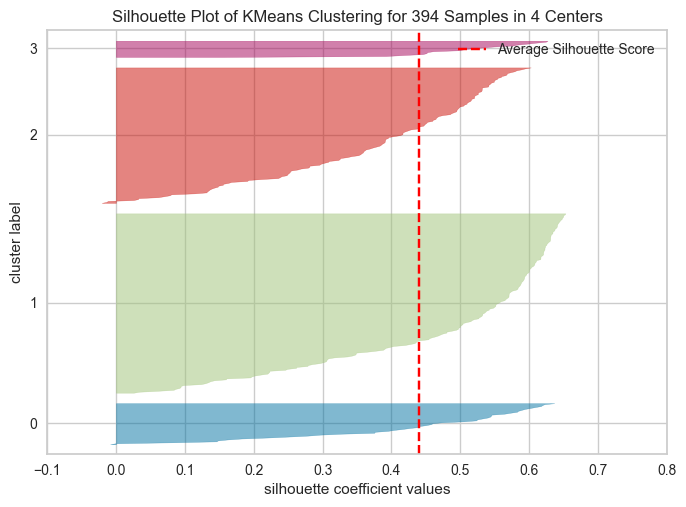

In [14]:
plot_model(kmeans, plot = 'silhouette')

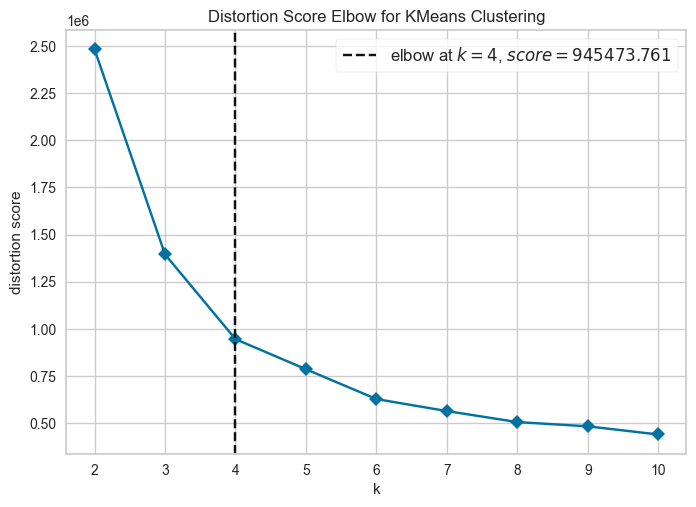

In [15]:
plot_model(kmeans, plot = 'elbow')

**Q3**

> What is the plot suggesting could be a good cluster number? Justify your answer.



In [16]:
centroids = kmeans.cluster_centers_
centroids

array([[4.15909091e+00, 1.50386364e+02, 7.30454545e+01, 2.98863636e+01,
        3.02772727e+02, 3.55272730e+01, 5.75795457e-01, 3.38636364e+01],
       [2.73015873e+00, 1.03442412e+02, 6.86402116e+01, 2.68148148e+01,
        7.51798942e+01, 3.10661375e+01, 4.78280423e-01, 2.79788360e+01],
       [3.77622378e+00, 1.33972028e+02, 7.22307692e+01, 3.10699301e+01,
        1.66965035e+02, 3.42482517e+01, 5.55538464e-01, 3.31538462e+01],
       [3.11111111e+00, 1.65833333e+02, 7.34444444e+01, 3.56666667e+01,
        5.48833333e+02, 3.69611114e+01, 6.60666672e-01, 3.45555556e+01]])

In [17]:
plot_model(kmeans, plot = 'cluster') #plot PCA

In [18]:
plot_model(kmeans, plot = 'distribution')

PyCaret generates distribution plots to visualize the distribution of data points within each cluster.

Distribution plots help in understanding,
* how the data points are distributed within each cluster.
* potential outliers or anomalies within cluster.
* the density of data points within each cluster.
* similar or dissimilar characteristics among clusters.

In [19]:
plot_model(kmeans, plot = 'distribution', feature="Glucose")

From the above plot we can see the feature ranges are quite different. As there are different scales in the features of the dataset, so there is definitely a need to normalize the dataset to ensure a better result.  Let's try what effect this has!

We can use normalize=True in setup()

 There are several methods available for normalization like minmax,maxabs,robust. by default, PyCaret uses zscore.


In [20]:
s = setup(df, normalize=True, ignore_features=['Outcome'])

,Description,Value
0,Session id,2659
1,Original data shape,"(394, 9)"
2,Transformed data shape,"(394, 8)"
3,Ignore features,1
4,Numeric features,8
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


**Q4**


> Did you notice a difference in silhouette scores before and after normalization? If yes explain what are the possible reasons for that.



After normalisation all features are laying in the same scale and difference between each values within each feature is also scaled. This might help to improve clustering.

In [21]:
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [22]:
# get X_transformed
get_config('X_transformed')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.713386,-1.093411,-0.373759,-0.582083,-0.518847,-0.678875,-1.025340,-0.963548
1,-1.025344,0.467872,-2.461427,0.561761,0.104968,1.404168,5.040166,0.214537
2,-0.089470,-1.451205,-1.658478,0.275800,-0.569426,-0.276153,-0.793701,-0.472679
3,-0.401428,2.419475,-0.052579,1.514965,3.266189,-0.345588,-1.051077,2.178012
4,-0.713386,2.159262,-0.855528,-0.582083,5.820456,-0.401135,-0.364740,2.767055
...,...,...,...,...,...,...,...,...
389,-1.025344,1.899048,1.392730,1.419645,2.988002,1.431942,-0.868054,-0.472679
390,-0.713386,0.175131,1.392730,0.943043,-0.383968,0.487629,1.519828,0.607232
391,-0.401428,-1.125938,-1.016118,-0.296122,-1.176381,-0.637214,0.687644,-0.865374
392,2.094236,-0.703090,0.429191,1.800926,0.206127,-0.012301,-1.013901,3.159750


# Clustering with normalized dataset

In [23]:
kmeans_4 = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1543,84.2644,1.7521,0,0,0


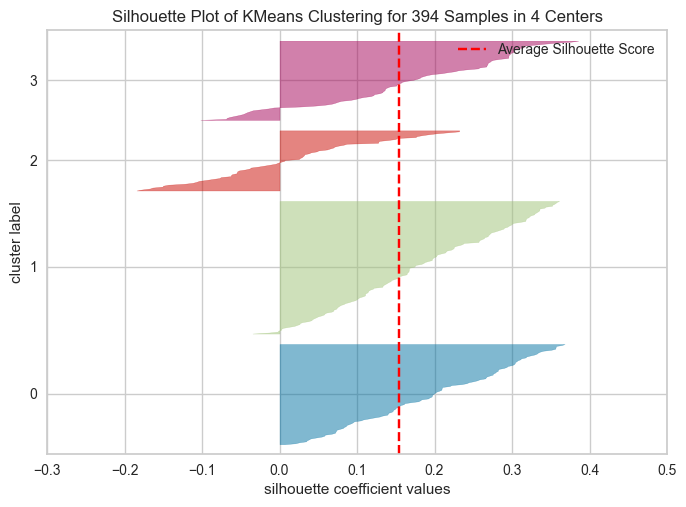

In [24]:
plot_model(kmeans_4, plot = 'silhouette')

In [25]:
centroids = kmeans_4.cluster_centers_
centroids

array([[-0.3896562 , -0.56101617, -0.12151138,  0.48352665, -0.36082554,
         0.47806572, -0.17097927, -0.42451857],
       [-0.3858303 , -0.35862875, -0.47871568, -0.91570481, -0.3788499 ,
        -0.85117195, -0.13065002, -0.5308823 ],
       [-0.4794177 ,  1.08079725,  0.53708709,  0.88495703,  1.13684294,
         0.99819186,  0.50278842, -0.09839179],
       [ 1.50003014,  0.48219898,  0.54198604,  0.24175713,  0.22057792,
         0.05481938,  0.0504327 ,  1.49547101]])

In [26]:
plot_model(kmeans_4, plot = 'cluster')

In [27]:
plot_model(kmeans_4, plot = 'distribution', feature="Glucose")

In [28]:
plot_model(kmeans_4, plot = 'distribution', feature="Insulin")

**Q5**

> What can you say about glucose and insulin distribution within different clusters? Have you noticed any specific tendencies? Do you consider these results biologically relevant? Please justify your answers.




Upto now you have worked with a linear clustering method - Kmeans.
When we're trying to group our data points into clusters, sometimes the relationships between them are simple and straight, like connecting dots with lines. As we mentioned in the clustering moodle book, that's where K-means clustering comes in. It's great at finding these *straight-line patterns*.

But what if our data is more like a tangled web of connections, with curves and twists, we need to use non-linear clustering methods like Mean Shift, DBSCAN, and OPTICS.
You can try the other clustering methods and see how they make clusters.

As we discussed under dimensionality reduction section in clustering moodle book, when we want to take a big jumble of data and shrink it down into a simpler picture, we use non-linear techniques like t-SNE and UMAP. They're tools that can preserve non-linear relationships between points while making everything easier to understand. Let's plot also these visualisations.

In [29]:
plot_model(kmeans_4, plot = 'tsne')

In [30]:
!pip install umap-learn


In [32]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()

scaled_data = StandardScaler().fit_transform(df.iloc[:,:-1])
embedding = reducer.fit_transform(scaled_data)


We remove the outcome column because UMAP is unsupervised and should only use features. Including the outcome would bias the embedding and give misleading results.

In [33]:
pred_4 = kmeans_4.labels_
pred_4

array([1, 2, 0, 2, 2, 3, 2, 0, 0, 2, 3, 3, 1, 3, 2, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 2, 0, 1, 1, 1, 1, 0, 0, 3, 0, 0, 3, 1, 0, 1, 3, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 3, 0, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 0, 2, 3, 2, 1, 1, 1, 3, 3, 2, 3, 1, 0, 0, 1, 3, 2, 1,
       1, 3, 2, 3, 0, 3, 2, 1, 0, 1, 1, 3, 3, 0, 0, 3, 3, 0, 0, 2, 3, 1,
       0, 2, 0, 3, 1, 0, 3, 0, 1, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 0, 0, 1,
       1, 3, 3, 3, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 3, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 0, 1, 1, 2, 3, 1, 1, 3, 1, 1,
       1, 0, 3, 2, 2, 2, 0, 1, 3, 2, 1, 0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1,
       1, 3, 1, 0, 1, 1, 1, 1, 3, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 3, 2,
       2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 3, 3, 3, 0, 1, 1,
       0, 2, 0, 1, 3, 2, 1, 0, 2, 2, 2, 0, 3, 1, 3, 3, 1, 3, 2, 1, 1, 1,
       1, 1, 3, 3, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 3, 1, 0, 0, 3, 3, 1, 3,
       0, 1, 0, 3, 2, 0, 1, 1, 0, 3, 3, 0, 1, 1, 2,

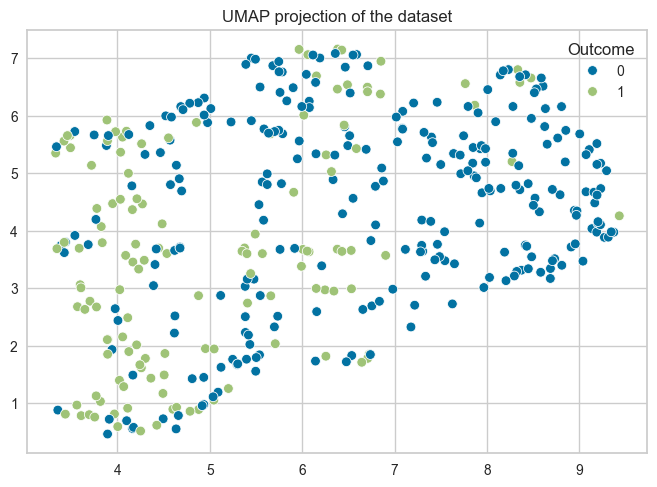

In [34]:
sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=df.Outcome)
plt.title('UMAP projection of the dataset', fontsize=12);

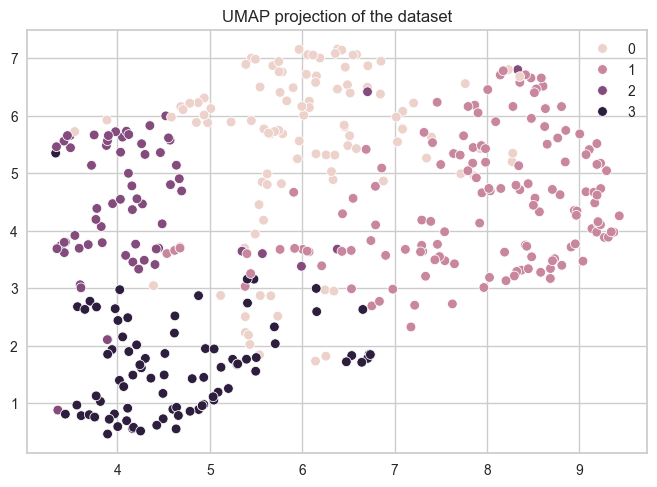

In [35]:
sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=pred_4)
plt.title('UMAP projection of the dataset', fontsize=12);



> **Q6** What can you say about the clusters obtained from the model vs outcome feature labels?



# Clustering with pre-defined cluster count

Now let's try to plot with defining the cluster number as 2. (Our true Outcome column has 0 and 1 values.)

In [37]:
kmeans = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2389,111.4929,1.7633,0,0,0


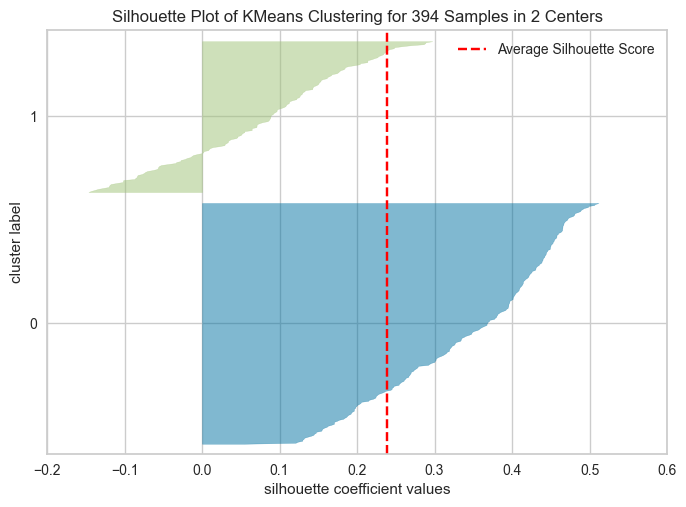

In [38]:
plot_model(kmeans, plot = 'silhouette')

In [39]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.40271728, -0.43472939, -0.37973107, -0.37253611, -0.37574715,
        -0.31792859, -0.10075782, -0.47551902],
       [ 0.6411683 ,  0.69213496,  0.60457183,  0.5931167 ,  0.59822902,
         0.50617579,  0.16041706,  0.75707633]])

In [40]:
plot_model(kmeans, plot = 'cluster')

In [41]:
plot_model(kmeans, plot = 'distribution', feature="Glucose")

In [42]:
plot_model(kmeans, plot = 'distribution', feature="Insulin")

In [43]:
plot_model(kmeans, plot = 'tsne')

In [44]:
pred = kmeans.labels_


In [45]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

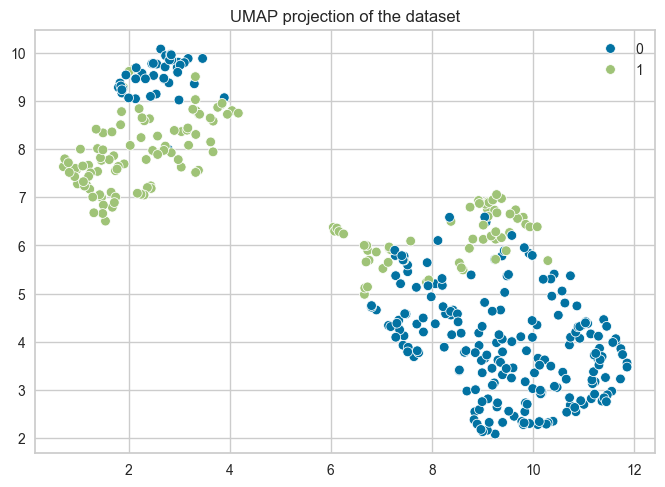

In [46]:
sns.scatterplot(x=embedding[:, 0], y= embedding[:, 1], hue=pred)
plt.title('UMAP projection of the dataset', fontsize=12);